# LU IGI

## Making a model

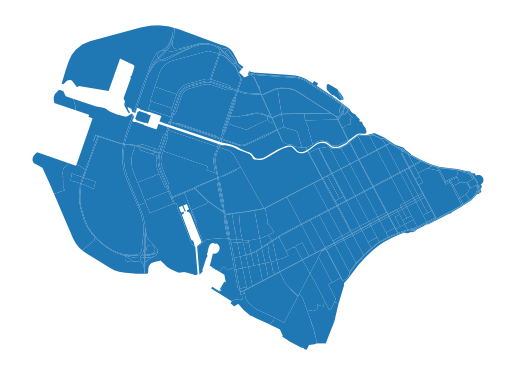

In [2]:
import osmnx as ox
import geopandas as gpd

blocks_gdf = gpd.read_parquet('data/spb_blocks.parquet')
blocks_gdf.head()
clip_gdf = ox.features_from_place('Санкт-Петербург', tags={'name':'Василеостровский район'}).to_crs(blocks_gdf.crs)
blocks_gdf = blocks_gdf[blocks_gdf.intersects(clip_gdf.union_all())]
blocks_gdf.plot().set_axis_off()

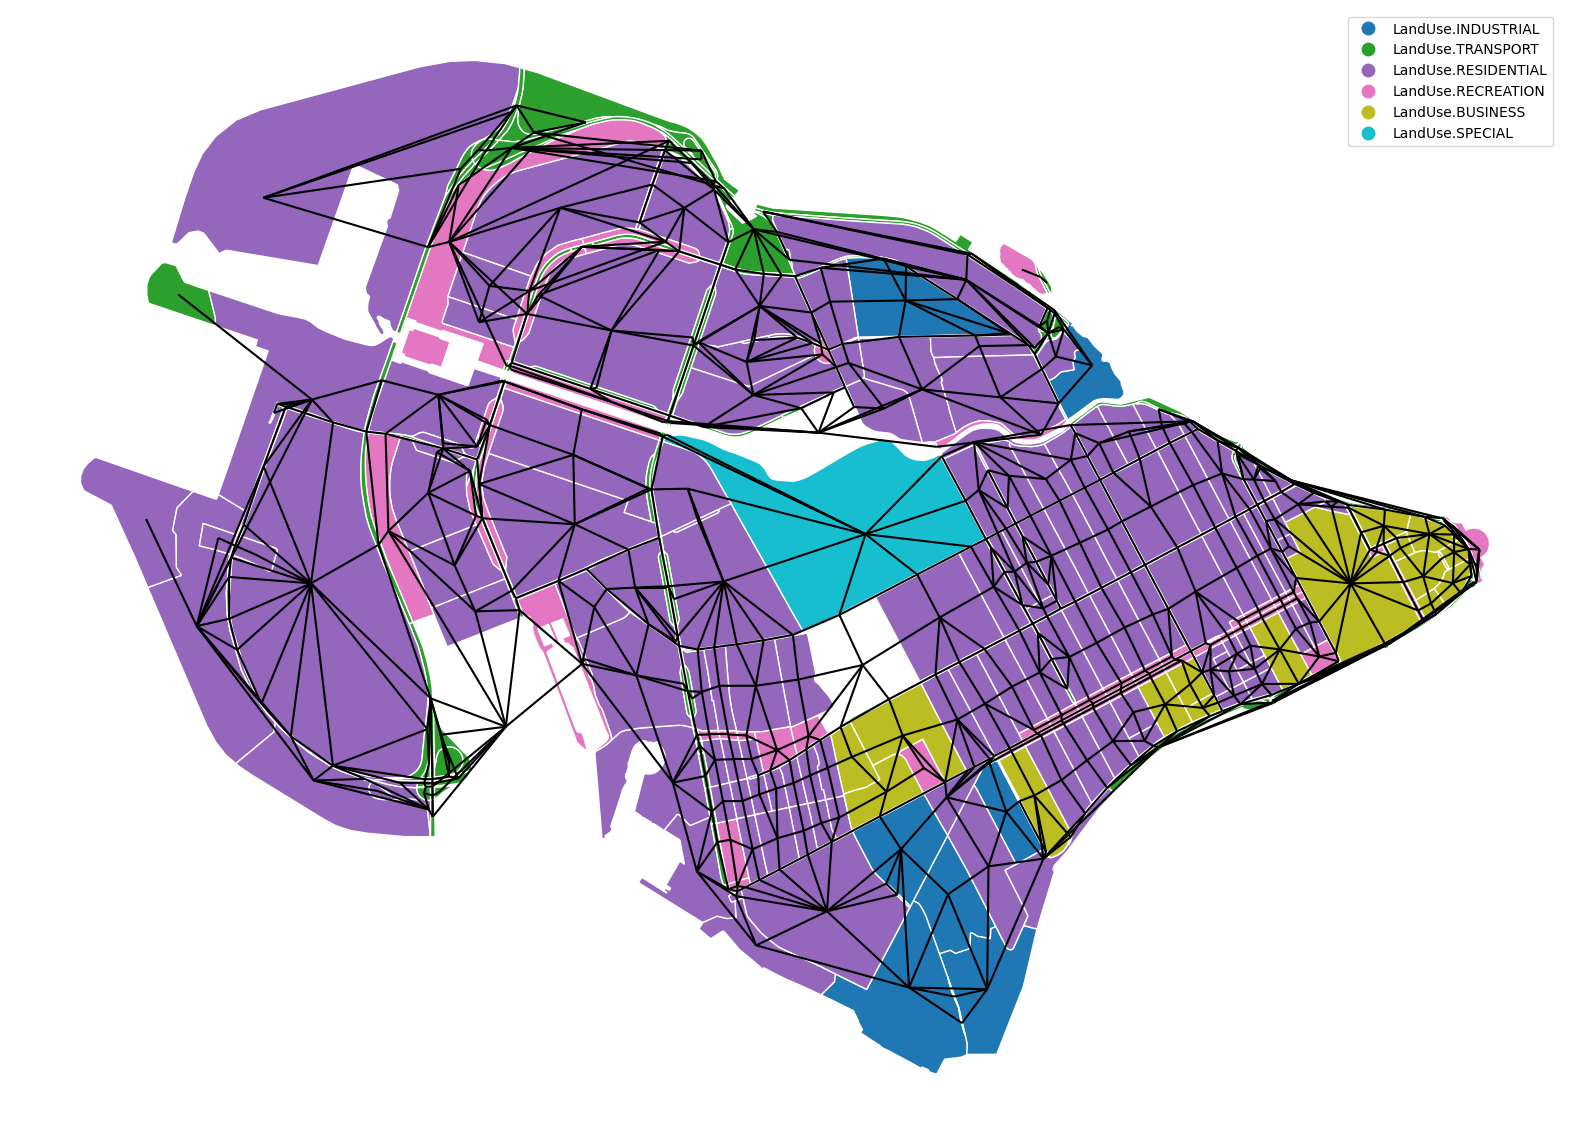

In [3]:
import random
from lu_igi.model import Model, LAND_USE_NAME
from lu_igi.land_use import LandUse

blocks_gdf[LAND_USE_NAME] = blocks_gdf['land_use'].apply(lambda lu : LandUse[lu] if lu is not None else None)
model = Model(blocks_gdf)
model.plot()

## Pymoo

Selecting territory to be changed

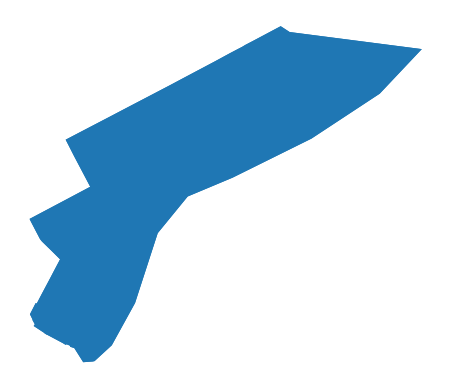

In [4]:
territory_gdf = ox.features_from_place('Санкт-Петербург', tags={'name':'округ № 7'}).to_crs(blocks_gdf.crs)
territory_gdf.plot().set_axis_off()

In [5]:
target_lu_shares = {
    LandUse.RESIDENTIAL : 0.5,
    LandUse.RECREATION : 0.3,
    LandUse.BUSINESS : 0.2
}

In [6]:
from lu_igi.pymoo_optimizer import PymooOptimizer, FitnessType, OptimizationAlgorithm

optimizer = PymooOptimizer(model, )
result, gdfs = optimizer.run(territory_gdf, target_lu_shares, n_eval=100, opt_alg=OptimizationAlgorithm.BRKGA)

TypeError: pymoo.algorithms.base.genetic.GeneticAlgorithm.__init__() got multiple values for keyword argument 'mutation'

<Axes: >

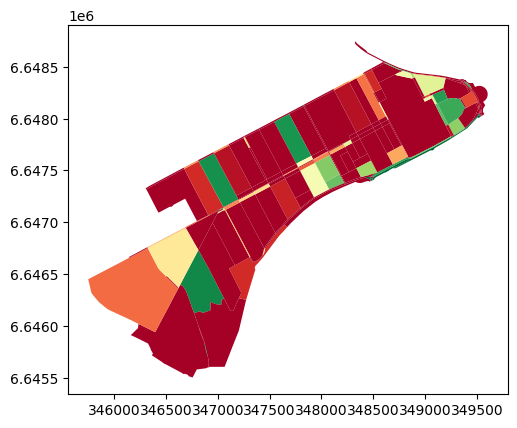

In [ ]:
gdf = gdfs[FitnessType.PROBABILITY]
gdf['probability'] = gdf.apply(lambda s : s['probabilities'].get(s['assigned_land_use'],0), axis=1)
gdf.plot(column='probability', vmin=0, vmax=1, cmap='RdYlGn')

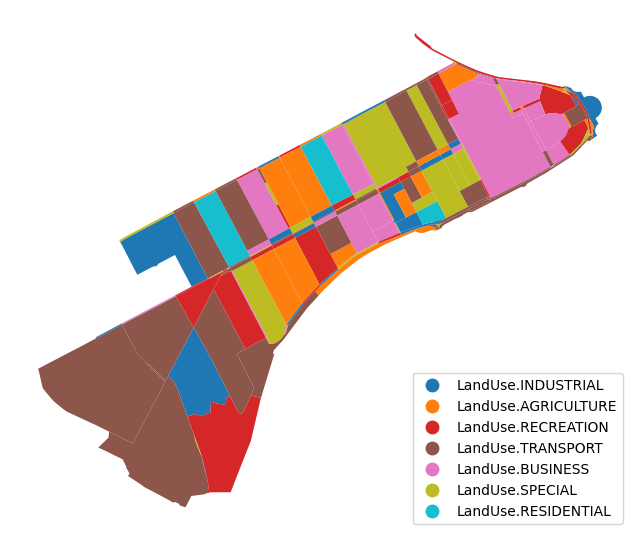

In [8]:
gdf.plot(column='assigned_land_use', legend=True, legend_kwds={'loc':'lower right'}, figsize=(8,8)).set_axis_off()